In [1]:
from pydynverse.wrap import wrap_expression, infer_trajectory, add_dimred
from pydynverse.methods import ti_comp1, ti_slingshot, ti_monocle_ddrtree
from pydynverse.plot import plot_dimred
from pydynverse.dimred import dimred_mds

from pydynverse import logger

logger.setLevel("DEBUG")

In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = wrap_expression(
    counts=fibroblast_reprogramming_treutlein.rx2["counts"],
    expression=fibroblast_reprogramming_treutlein.rx2["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年11月25日 17时33分17秒] DEBUG    Resolving cell_ids and feature_ids                                          
                        DEBUG    Dataset created: {'id': '20241125_173317__data_wrapper__rsiD24m3V3', 'cell_ids':  
                                 array(['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05',           
                                        '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', '1_iN1_C11',           
                                        '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15', '1_iN1_C16',           
                                        '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21', '1_iN1_C22',           
                                        '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27', '1_iN1_C29',           
                                        '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34', '1_iN1_C35',           
                                        '1_iN1_C36', '1_iN1_C37', '1_iN1_C38',

In [ ]:
# 2. 选择方法(method)
methods_selected_list = [ti_comp1(), ti_slingshot(), ti_monocle_ddrtree()]
methods_selected = methods_selected_list[1]
logger.info(f"Methods {methods_selected} selecting finished")

                        DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                                 
                        INFO     Methods {'method': {'id': 'slingshot', 'name': 'Slingshot', 'source': 'tool',     
                                 'platform': 'R', 'license': 'Artistic-2.0', 'url':                                
                                 'https://github.com/kstreet13/slingshot', 'authors': [{'given': 'Kelly', 'family':
                                 'Street', 'email': 'street.kelly@gmail.com', 'github': 'kstreet13'}, {'given':    
                                 'Sandrine', 'family': 'Dudoit', 'email': 'sandrine@stat.berkeley.edu', 'ORCID':   
                                 '0000-0002-6069-8629', 'github': 'sandrinedudoit'}]}, 'wrapper': {'type':         
                                 'trajectory', 'topology_inference': 'free', 'trajectory_types': ['linear',        
                                 'bifurcation', 'convergence', 'multifur

In [4]:
# 3. 运行方法(wrap)
model = infer_trajectory(dataset, methods_selected)
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpmfzeyeiq                                                         
                        DEBUG    Save json successfully, path: /tmp/tmpmfzeyeiq/input.json                         
[2024年11月25日 17时33分19秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/RScript/dynverse
                                       _docker_io_24_11_21_json2h5.R', '--input_json_filename',                    
                                       '/tmp/tmpmfzeyeiq/input.json', '--input_h5_filename',                       
                                       '/tmp/tmpmfzeyeiq/input.h5'], returncode=0, stdout='[1] "json2h5            
                                       successful!"\n', stderr='')                                                 
                        DEBUG    json2h5 successful!                                                               
                        DEBUG    docker args: ['--dataset', '/ti/input.h5', '-

                        INFO     Coloring by grouping                                                              
    from to  percentage        0        1        2
0      3  2      0.0000 -74.3678  -4.7329 -16.5209
1      3  2      0.0391 -73.8174  -4.2952 -16.3266
2      3  2      0.0783 -73.1489  -3.7750 -16.0826
3      3  2      0.1174 -72.3227  -3.1498 -15.7720
4      3  2      0.1566 -71.2851  -2.3911 -15.3719
..   ... ..         ...      ...      ...      ...
101    1  5      0.8791  55.7826  -7.9908 -30.9515
102    1  5      0.9105  54.7496  -9.6830 -31.6959
103    1  5      0.9419  53.7681 -11.1890 -32.3124
104    1  5      0.9733  52.8604 -12.5147 -32.8224
105    1  5      1.0000  52.1547 -13.5095 -33.1866

[106 rows x 6 columns]
                        INFO     Result plotting finished                                                          


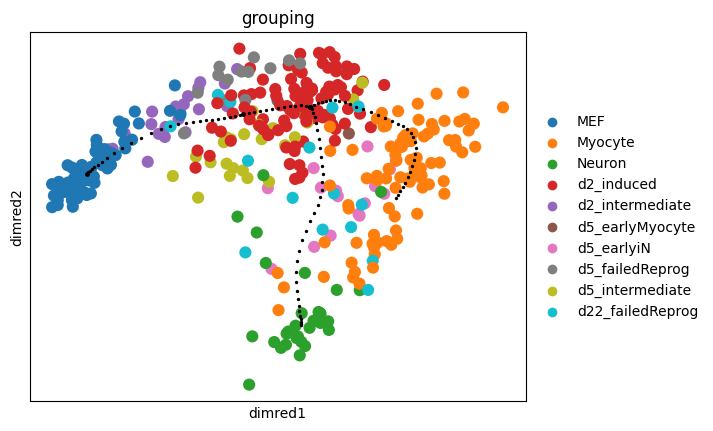

In [5]:
# 4. 绘制轨迹(dimred+plot)
# model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果, docker输出容器
plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein.rx2["grouping"]))
logger.info("Result plotting finished")